In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных и разделение на тестовую и обучающую выборки

In [2]:
# Загрузка датасета
df = pd.read_csv('SI_data.csv')
df.head()

,SI log10,MaxAbsEStateIndex,MaxAbsEStateIndex log10,MaxEStateIndex,MaxEStateIndex log10,MinAbsEStateIndex,MinEStateIndex,MinEStateIndex_log10_sign,qed,qed log10,...,fr_piperdine,fr_piperzine,fr_priamide,fr_quatN,fr_sulfide,fr_sulfonamd,fr_tetrazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.449093,5.094096,0.707067,5.094096,0.707067,0.387225,0.387225,0.142147,0.417362,-0.379487,...,0,0,0,0,0,0,0,0,3,0
1,0.845098,3.961417,0.597851,3.961417,0.597851,0.533868,0.533868,0.185788,0.462473,-0.334914,...,0,0,0,0,0,0,0,0,3,0
2,-0.142668,2.627117,0.419479,2.627117,0.419479,0.543231,0.543231,0.188431,0.260923,-0.583488,...,0,0,0,2,0,0,0,0,3,0
3,1.800960,5.097360,0.707345,5.097360,0.707345,0.390603,0.390603,0.143203,0.377846,-0.422686,...,0,0,0,0,0,0,0,0,4,0
4,0.113943,5.150510,0.711850,5.150510,0.711850,0.270476,0.270476,0.103966,0.429038,-0.367504,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Определим целевую переменную и предикторы
X = df.drop(columns=['SI log10'])  # предикторы (все колонки, кроме IC50)
y = (df['SI log10'] > df['SI log10'].median()).astype(int)  # целевая переменная на основе IC50

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение моделей

Для обучения были выбраны четыре модели: логистическая регрессия, Дерево решений, случайный лес и градиантны бустинг.  
Каждая модель имеет свои преимущества, например логистическая регрессия проста в интерпретации и хорошо работает на линейных данных, что позволяет легко понять влияние отдельных признаков на результат. Дерево решений является интуитивно понятным и наглядным, что делает его удобным для визуализации процессов принятия решений. Случайный лес, в свою очередь, обладает высокой устойчивостью к переобучению благодаря созданию множества деревьев и объединению их результатов, что значительно улучшает точность предсказаний. Градиентный бустинг, имея возможность уменьшать ошибку модели, использует комбинацию слабых моделей и может достичь высокой точности на сложных данных, однако требует более тщательной настройки гиперпараметров.

Каждая из этих моделей была протестирована на нашем наборе данных, чтобы определить наилучший подход для достижения максимальной производительности в задаче.

In [9]:
# Инициализируем модели
models = {
    'Логистическая регрессия': LogisticRegression(),
    'Дерево решений': DecisionTreeClassifier(),
    'Случайный лес': RandomForestClassifier(),
    'Градиентный бустинг': GradientBoostingClassifier()}

In [11]:
# Обучаем и оцениваем модели
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1}


Выведем полученные результаты аккуратным списком.

In [12]:
for model_name, metrics in results.items():
    print(f"Модель: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("="*30)

Модель: Логистическая регрессия
Accuracy: 0.6617
Precision: 0.6263
Recall: 0.6667
F1-score: 0.6458
Модель: Дерево решений
Accuracy: 0.6070
Precision: 0.5714
Recall: 0.6022
F1-score: 0.5864
Модель: Случайный лес
Accuracy: 0.6816
Precision: 0.6495
Recall: 0.6774
F1-score: 0.6632
Модель: Градиентный бустинг
Accuracy: 0.6617
Precision: 0.6344
Recall: 0.6344
F1-score: 0.6344


На основе проведённого анализа можно сделать вывод о том, что лучшей моделью на текущем этапе является случайный лес, показавший максимальные значения accuracy (0.6816) и F1-score (0.6632) среди всех протестированных алгоритмов. Это говорит о более высокой общей точности и сбалансированности между точностью и полнотой у данной модели. Логистическая регрессия и градиентный бустинг продемонстрировали схожие результаты, однако их показатели оказались чуть ниже (особенно по F1-score). Дерево решений показало наименьшие значения по всем метрикам, что свидетельствует о его меньшей устойчивости и способности к обобщению на выборке такого объёма и структуры. Применение логарифмирования целевой переменной способствовало лучшему приближению её распределения к нормальному, что положительно сказалось на качестве обучения моделей.

В целом, среди рассмотренных вариантов, случайный лес демонстрирует наилучшее соотношение между всеми основными метриками, что делает его приоритетным для дальнейшего использования на данном датасете.

# Выводы

Для наглядности необходимо визуализировать данные. Это поможет дать окончательный вывод.

In [15]:
#  Подготовка данных
models = list(results.keys())
metrics_list = ["Accuracy", "Precision", "Recall", "F1-score"]

# Создаем матрицу значений [модель x метрика]
values = np.array([
    [results[model][metric] for metric in metrics_list]
    for model in models])

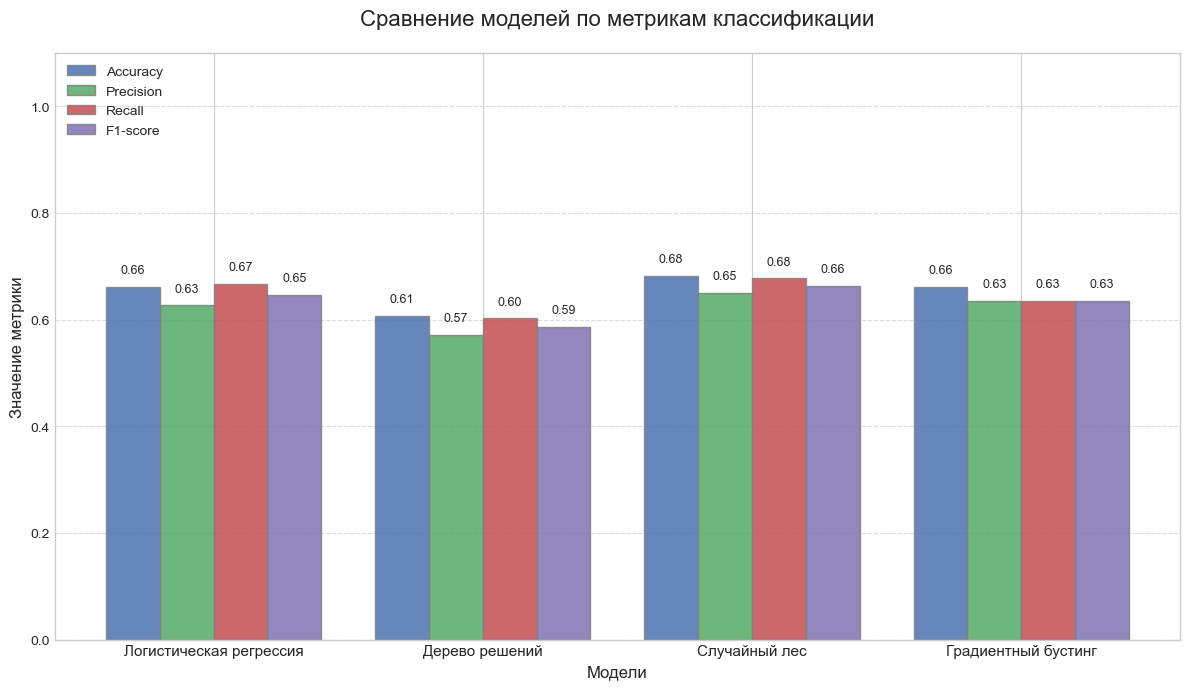

In [17]:
# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # Цвета для метрик

# Групповая диаграмма
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.2  # Ширина столбца
x_pos = np.arange(len(models))  # Позиции для групп моделей

# Рисуем столбцы для каждой метрики
for i, metric in enumerate(metrics_list):
    ax.bar(
        x_pos + i * bar_width,  # Смещение для группировки
        values[:, i], 
        width=bar_width,
        label=metric,
        color=colors[i],
        edgecolor='grey',
        alpha=0.85)

# Оформление
ax.set_title('Сравнение моделей по метрикам классификации', fontsize=16, pad=20)
ax.set_xlabel('Модели', fontsize=12)
ax.set_ylabel('Значение метрики', fontsize=12)
ax.set_xticks(x_pos + bar_width * 1.5)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(0, 1.1)  # Диапазон для метрик классификации
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Добавление значений на столбцы
for i, model in enumerate(models):
    for j, metric in enumerate(metrics_list):
        height = values[i, j]
        ax.annotate(
            f'{height:.2f}',
            xy=(x_pos[i] + j * bar_width, height + 0.02),
            ha='center', 
            va='bottom',
            fontsize=9)

plt.tight_layout()
plt.show()

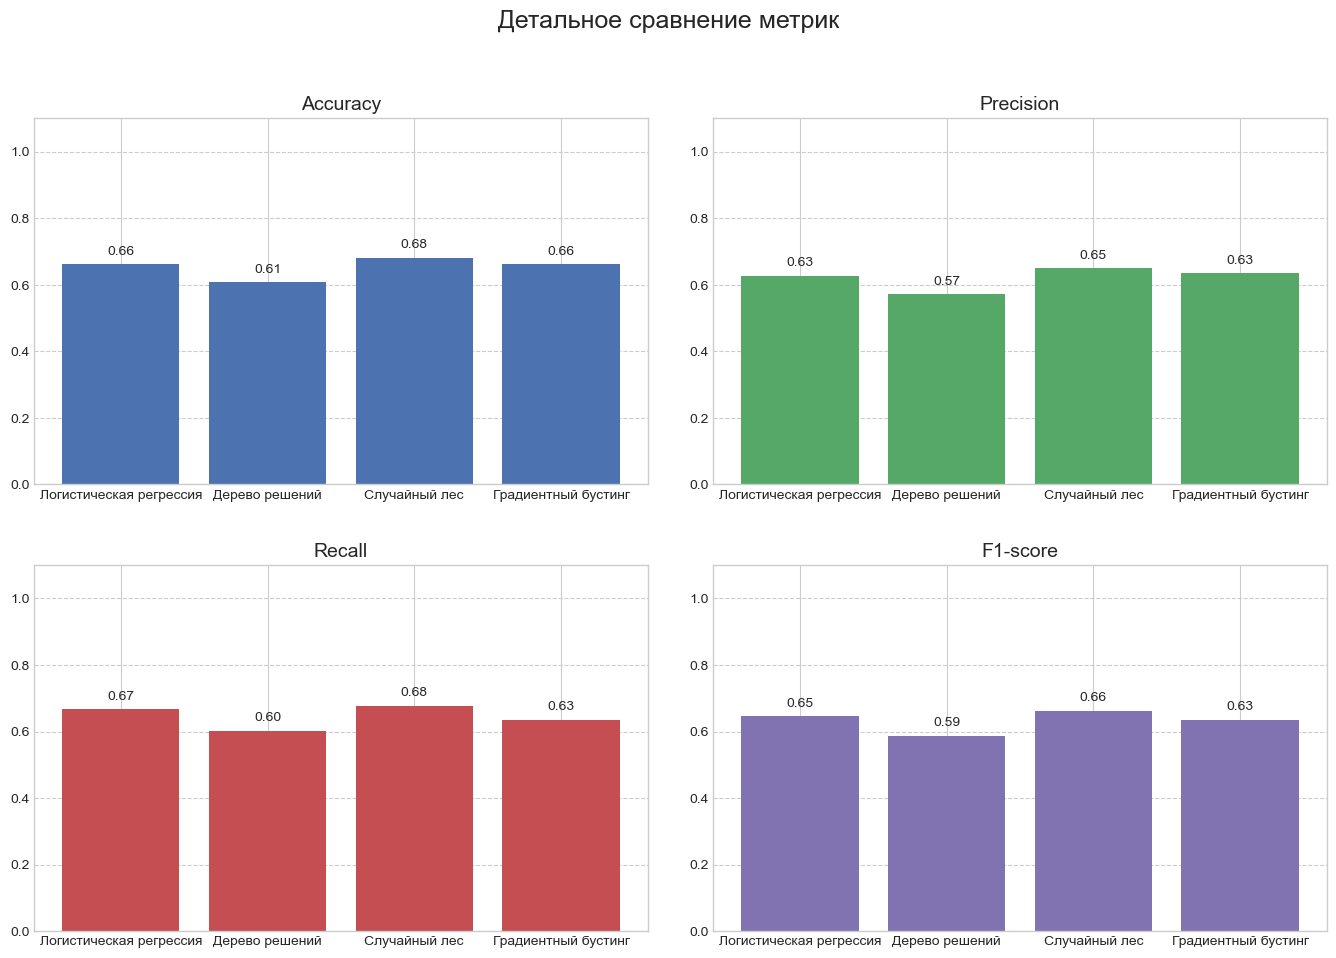

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Детальное сравнение метрик', fontsize=18)

for i, metric in enumerate(metrics_list):
    ax = axs[i//2, i%2]
    ax.bar(models, values[:, i], color=colors[i])
    ax.set_title(metric, fontsize=14)
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', linestyle='--')
    
    # Добавление значений
    for j, val in enumerate(values[:, i]):
        ax.annotate(f'{val:.2f}', xy=(j, val+0.03), ha='center', fontsize=10)

plt.tight_layout(pad=3.0)

В целом, все четыре модели неплохо себя показали. Как видно, логистическая регрессия, случайный лес и градиентный бустинг показали себя лучше всего, и их результаты практически не отличаются. Лидер с небольшим преимуществом — случайный лес. Дерево решений — явный аутсайдер, хоть и отстает совсем немного.

Тем не менее, различия в ключевых метриках позволяют сделать некоторые выводы о преимуществах и недостатках каждого подхода.можно отметить, что случайный лес продемонстрировал наилучшие значения по всем основным метрикам (accuracy, precision, recall, F1-score), что свидетельствует о его большей способности выявлять закономерности в данных по сравнению с отдельным деревом решений и даже с градиентным бустингом. Вероятно, это связано с ансамблевой природой метода, обеспечивающей устойчивость к переобучению и лучшую обобщающую способность по сравнению с одиночными моделями.

Логистическая регрессия и градиентный бустинг показали очень схожие показатели, немного уступая случайному лесу по всем метрикам, однако превосходя дерево решений. Это может указывать на то, что данные обладают линейной структурой, пригодной для моделирования логистической регрессией, а использование более сложных моделей целесообразно лишь при незначительном приросте точности.

Дерево решений, несмотря на простоту интерпретации, уступает остальным моделям, что типично для данного метода при работе с относительно сложными и многомерными данными без дополнительной настройки гиперпараметров или методов регуляризации.

Таким образом, для данной задачи наиболее целесообразным выбором является случайный лес как оптимальный компромисс между точностью, полнотой и универсальностью модели, однако небольшое превосходство над логистической регрессией и градиентным бустингом может не оправдывать существенно большей вычислительной сложности. Выбор финальной модели рекомендуется основывать не только на метриках точности, но и на задачах интерпретируемости и допустимых ограничениях вычислительных ресурсов.ов.ете.